<a href="https://colab.research.google.com/github/mwele/applied_ai_code/blob/master/gensim_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer #BOWs
from sklearn.feature_extraction.text import TfidfVectorizer #Tfidf
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import nltk
from nltk.stem.porter import PorterStemmer

import re 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip /content/drive/MyDrive/amazon.zip

Archive:  /content/drive/MyDrive/amazon.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [13]:
con=sqlite3.connect("database.sqlite")
filtered_data=pd.read_sql_query("SELECT * from reviews",con)
filtered_data.shape
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
reviewText=filtered_data.Text
reviewText

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [15]:
#text preprocessing using gensim library

Text preprocessing using GENSIM **library** **bold text**

In [17]:
reviewText.shape
reviewText[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [18]:
import gensim 
review_text= reviewText.apply(gensim.utils.simple_preprocess)

In [20]:
review_text[0]

['have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'stew',
 'than',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [21]:
model=gensim.models.Word2Vec(min_count=1, window=10, workers=4)

In [22]:
model.build_vocab(review_text, progress_per=1000)

In [23]:
model.epochs

5

In [24]:
model.corpus_count

568454

In [25]:
model.corpus_total_words

43060722

In [36]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)

In [37]:
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [39]:
words = list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [41]:
print(model['sentence'].shape)

(100,)


In [42]:
print(model['sentence'])

[ 4.9859984e-03 -3.5337487e-03 -4.6479004e-03  3.0302447e-03
 -1.0595478e-03  2.9110615e-03 -3.3241338e-03 -4.1530975e-03
 -1.7629297e-03  3.9010337e-03  4.3465202e-03 -2.4760240e-03
 -4.6420624e-03 -4.7634249e-03  2.4484142e-03 -1.2340308e-03
  1.3686707e-03  3.5595677e-03  9.8436465e-04 -3.3111114e-03
 -4.3290886e-03  3.9768000e-03  1.6025145e-03 -1.2550105e-03
 -3.9759856e-03  2.1812709e-03  4.4522192e-03 -4.5818798e-03
  3.7326100e-03 -3.0097517e-03  2.3445024e-03 -3.6492369e-03
  2.9087418e-03 -1.6677883e-03 -3.5396544e-03 -3.5275468e-03
 -1.5818404e-03  2.5558181e-03  2.7407641e-03 -4.0532076e-03
 -1.6394908e-04 -1.2276883e-03  2.1349089e-03  4.7674910e-03
  4.2217970e-03  7.5856115e-05 -4.7802096e-03 -2.5098291e-03
  7.4011245e-04  7.1444851e-04 -3.5824270e-03  2.7404190e-03
 -4.0276459e-04  2.7076527e-03  1.4976114e-03 -9.9168823e-04
 -3.0083791e-03 -4.7470178e-03 -2.8543225e-03 -4.9806163e-03
 -1.3838325e-03 -2.2336013e-04 -1.0523904e-03  1.5198422e-03
  3.8905971e-04  4.99041

In [43]:
model.save('model.bin')

In [44]:
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


[[-0.00430716  0.00117196  0.00210131 ... -0.00247566  0.0035003
  -0.00193035]
 [ 0.00479015 -0.00314492  0.00036692 ...  0.00421226 -0.00130375
   0.00326016]
 [ 0.00353442 -0.00202337 -0.00411505 ... -0.00417381 -0.00432961
  -0.00362237]
 ...
 [ 0.00407772  0.00333844 -0.00281157 ... -0.00311111  0.00031741
   0.00079562]
 [ 0.00105942  0.00292705  0.00308325 ...  0.0016582  -0.00246078
  -0.00291229]
 [-0.0033441  -0.00459075  0.00222512 ...  0.0011999  -0.00183193
  -0.00404364]]


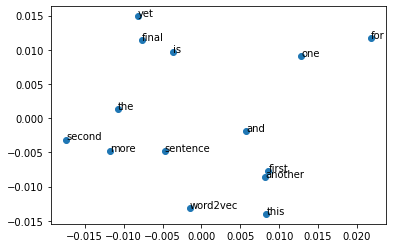

In [47]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
print(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [68]:
model2=Word2Vec(review_text, min_count=1000)

In [69]:
print(model2)

Word2Vec(vocab=2842, size=100, alpha=0.025)


In [70]:
words2=list(model2.wv.vocab)
words2

['have',
 'bought',
 'several',
 'of',
 'the',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'found',
 'them',
 'all',
 'to',
 'be',
 'good',
 'quality',
 'product',
 'looks',
 'more',
 'like',
 'stew',
 'than',
 'processed',
 'meat',
 'it',
 'smells',
 'better',
 'my',
 'is',
 'finicky',
 'she',
 'this',
 'most',
 'arrived',
 'labeled',
 'as',
 'salted',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'not',
 'sure',
 'if',
 'was',
 'an',
 'or',
 'vendor',
 'intended',
 'that',
 'has',
 'been',
 'around',
 'few',
 'light',
 'citrus',
 'with',
 'nuts',
 'in',
 'case',
 'cut',
 'into',
 'tiny',
 'squares',
 'then',
 'coated',
 'powdered',
 'sugar',
 'heaven',
 'too',
 'chewy',
 'very',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'you',
 'are',
 'familiar',
 'story',
 'selling',
 'out',
 'his',
 'brother',
 'looking',
 'for',
 'secret',
 'ingredient',
 'believe',
 'got',
 'addition',
 'root',
 'beer',
 'extract',
 'ordered',
 'which',
 'made',
 'some',
 'cherry

In [72]:
print(model2['cooking'])

[-1.0448775   3.3493905   1.8980489   0.06130997  2.615314   -1.5219724
  0.51291203 -0.08254055  1.7337761   3.6469727   3.0459936   1.3074648
 -2.068037   -3.115838    3.3442414  -1.300022   -2.2519946   0.10673922
  1.5709088  -2.3395774  -1.484156    2.468384   -0.69070125  0.8823752
  0.19004913  1.4142495   0.8182632   0.06891684 -2.9612029   0.7440491
 -1.4868277  -2.8681424   0.64949185  1.7916374  -1.3042878   3.300115
  0.7406093   2.1146398  -0.9341975   0.11903787  0.6302251   0.1131703
 -3.288015   -1.7365901  -0.14155255  2.6217356   1.9476582  -1.5507339
  0.04753546  0.28426522  1.5896511   1.1626226  -1.1393886  -0.20223099
  0.05178103  1.5624807   2.1175582   1.4401783  -3.344188    1.1402619
  3.0448322   0.1211272  -0.5422254   0.06859898 -0.19662283  2.5480897
  0.2111426  -0.49872673  0.53058     3.0296514  -0.16659959 -0.8235559
 -0.6155098  -0.7109872   0.9833298  -1.4422567   0.02020329  0.9736017
 -0.650107   -0.92563426 -3.3881981   2.9077759   1.1322776  -1

In [73]:
print(model2['jars'])

[ 0.73170865  0.367028   -0.0278969   0.76485574  0.23678106  3.369681
  0.03330736  0.03562785  0.5986501  -2.4413147   1.2387943   0.54788953
  0.92223114 -0.41491663  0.7238971  -0.56810844  0.23035203  0.6391814
  0.20583808  1.0114524  -0.5163598  -3.0939777   0.99680084  1.107519
  0.12717748 -4.0455217  -1.6743499   0.49043354 -3.5471268  -1.4335899
 -0.9694292  -1.4186699   0.58699065  0.31476915 -0.5189296  -0.4879295
 -0.6205783  -2.0410273  -1.2210234  -0.8579497   0.97663325 -4.4941506
  2.8344567  -2.5355422  -2.8925319  -1.0262834  -0.9678403  -2.6660604
 -1.04296     3.0569427  -1.2114846  -0.8319103  -1.032642    0.63492703
 -0.13600758 -1.5949516   0.81204975 -3.376858   -4.556228    1.0277436
  0.53735965  3.9066567   3.1671867  -1.6680723  -2.8415382   2.6328046
 -0.10563058  3.5665686   1.7749814  -2.1105297   1.1306236  -2.4495027
 -1.072816   -0.56733495 -0.6036938   0.32446533  0.10288626 -2.3837323
  1.7323138  -1.9920269  -0.90824753 -1.007378   -0.89453423 -1.

In [74]:
print(model2['sweetener'])

[-0.262978    0.26053107  2.2656987  -1.38201    -0.9334754   0.9628436
 -1.883724    1.6281807   0.36903659 -1.0412133   2.815915   -0.10445177
  0.5807234   0.14876315  3.293309   -1.5063472   2.9669108  -0.9259785
  0.27174708 -3.3606575  -1.0380343  -1.5630103  -2.0698335   2.513584
  2.5588605   3.8314195   0.09091152  1.0336158   0.10423896  1.314414
 -2.8504248   0.5622143   0.8882549  -3.5062284  -3.0213978   1.3438402
  4.5255985   1.1687853   0.47343394 -2.1825268  -0.18603024 -0.11911035
 -1.1689192  -3.0536861   2.600172    1.7897813  -0.3893613  -2.6193678
  2.5450578   2.3881183   0.37766764 -2.4600449   3.3914723   0.2865592
 -0.07187085 -2.0527978   1.5701467  -2.8775644   0.08832888  1.4031111
  5.379008   -4.7089424  -1.7200224   0.5538387  -2.4274414   1.294859
 -0.74121374 -0.4771126  -1.5199503  -4.318607   -1.6176953  -0.9016014
  0.5393509   2.509525    1.3144082  -0.15996903  3.3427093  -0.10032808
 -3.8234682   1.8703706  -2.7527719   0.37900504 -0.4027728   2.

In [75]:
model2.save('amazon_w2v.bin')

[[-2.1676612   5.5071454  -0.1574493  ... -1.6888032  -3.1513762
  -2.4051852 ]
 [-0.40151718  0.5667409   0.00831688 ... -2.4371948  -2.3448114
  -1.8976613 ]
 [ 0.4373579  -1.8317441   0.8627868  ...  0.95302063 -2.759244
   3.7405741 ]
 ...
 [-0.6134339  -0.9298382   0.97317994 ...  2.2659183  -1.7492259
   2.811755  ]
 [ 0.3930113   0.42354217  0.0183678  ...  1.1130786   0.22885603
   0.49179274]
 [ 0.41414785  1.2419163   1.6291243  ...  1.5567265   1.2213649
  -0.95539516]]


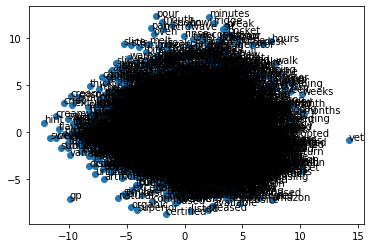

In [77]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model2[model2.wv.vocab]
print(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words2 = list(model2.wv.vocab)
for i, word in enumerate(words2):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()